<a href="https://colab.research.google.com/github/Supreeta11/bike-sharing-demand-prediction/blob/main/supreeta_kumari__Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime     #importing for date time application
import datetime as dt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source

from IPython.display import SVG
from IPython.display import display



In [ ]:
# Importing the  common libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime     #importing for date time application
import datetime as dt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source

from IPython.display import SVG
from IPython.display import display


from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path ="/content/drive/MyDrive/SeoulBikeData.csv"
bike_data=pd.read_csv(file_path,encoding='unicode_escape')


In [ ]:
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# dat description for the info
bike_data.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:

bike_data.shape

(8760, 14)

In [ ]:

bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#rename column
bike_data = bike_data.rename(columns={'Rented Bike Count': 'Rented_Bike_Count', 
                        'Temperature(°C)': 'Temperature',
                        'Humidity(%)': 'Humidity', 
                        'Wind speed (m/s)': 'Wind_speed', 
                        'Visibility (10m)': 'Visibility', 
                        'Dew point temperature(°C)': 'Dew_point_temperature', 
                        'Solar Radiation (MJ/m2)': 'Solar_Radiation', 
                        'Rainfall(mm)': 'Rainfall', 
                        'Snowfall (cm)': 'Snowfall',
                        'Functioning Day': 'Functioning_Day'})

In [ ]:
bike_data.dtypes

Date                      object
Rented_Bike_Count          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind_speed               float64
Visibility                 int64
Dew_point_temperature    float64
Solar_Radiation          float64
Rainfall                 float64
Snowfall                 float64
Seasons                   object
Holiday                   object
Functioning_Day           object
dtype: object

In [ ]:
print(bike_data.dtypes.astype(str).value_counts())

float64    6
object     4
int64      4
dtype: int64


In [ ]:
# see all the date or diffrent sesaons and holiday and functioning day
print(bike_data['Seasons'].unique())
print(bike_data['Holiday'].unique())
print(bike_data['Functioning_Day'].unique())
print(bike_data['Date'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'


In [ ]:
# data information for null value
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [ ]:
# checkng for no null value
bike_data.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [ ]:
# checkng for no null value
bike_data.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [ ]:
#extarcting all usefull from date formate
bike_data['Date']=pd.to_datetime(bike_data['Date'])
bike_data['Year'] = pd.DatetimeIndex(bike_data['Date']).year
bike_data['Day'] = pd.DatetimeIndex(bike_data['Date']).day
bike_data['Month']= pd.DatetimeIndex(bike_data['Date']).month
bike_data['weekday']=pd.DatetimeIndex(bike_data['Date']).weekday

In [ ]:
# data after date time extraction
bike_data.head(2)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Year,Day,Month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3


In [ ]:
display(bike_data['weekday'].unique())

array([3, 6, 2, 4, 0, 5, 1])

In [ ]:
#weekday is in range 0-6, so we need to make it to normal 1-7
bike_data['weekday'] = np.array(bike_data['weekday'])+1
display(bike_data['weekday'].unique())

array([4, 7, 3, 5, 1, 6, 2])

In [ ]:
# Rented_bike_per_year = pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Year']).sum()).reset_index().sort_values("Year", ascending=True)
# Rented_bike_per_month = pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Month']).sum()).reset_index().sort_values("Month", ascending=True)
# Rented_bike_per_Day= pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Day']).sum()).reset_index().sort_values("Day", ascending=True)
Rented_bike_per_Weekday= pd.DataFrame(bike_data['Rented_Bike_Count'].groupby(by=bike_data['weekday']).sum()).reset_index().sort_values("weekday", ascending=True)
Rented_bike_per_Weekday

,weekday,Rented_Bike_Count
0,1,863563
1,2,862877
2,3,908871
3,4,928267
4,5,898966
5,6,911475
6,7,798295


In [ ]:
# read the data for the year
bike_data['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

In [ ]:
# year mont count from the data set
bike_data.groupby(['Year','Month']).agg({'Rented_Bike_Count':['sum']}).reset_index()

,Year,Month,Rented_Bike_Count
,,,sum
0,2017,1,9539
1,2017,2,8523
2,2017,3,7222
3,2017,4,8729
4,2017,5,8307
5,2017,6,6669
6,2017,7,8549
7,2017,8,8032
8,2017,9,7233


In [ ]:
bike_data['Months_string'] = bike_data['Month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [ ]:
import plotly.express as px

In [ ]:
#line plot for the month_year group
month_year_group= bike_data.groupby(by=['Month','Months_string','Year']).agg({'Rented_Bike_Count':'sum'}).reset_index()
px.line(month_year_group,y= 'Rented_Bike_Count',x= 'Months_string',color= 'Year',title='Total Rented Bikes in 2017 and 2018 on monthly basis',width=1000, height=500)

In [ ]:
#bar plot for diffrent year
px.bar(month_year_group,y= 'Rented_Bike_Count',x='Months_string' ,facet_row= 'Year',title='Total Rented Bikes on monthly basis in 2017 and 2018',width=800, height=600)


In [ ]:
#bar plot for diffrent year
px.bar(month_year_group,y= 'Rented_Bike_Count',x='Months_string' ,facet_row= 'Year',title='Total Rented Bikes on monthly basis in 2017 and 2018',width=800, height=600)


In [ ]:
# histogram  plot for the rented bike and year
px.histogram(bike_data, x="Rented_Bike_Count",marginal="violin",color='Year')

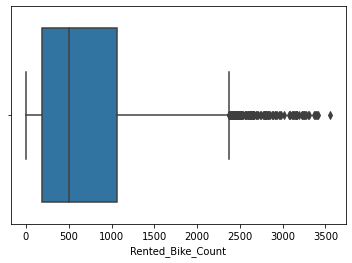

In [ ]:
sns.boxplot(x = bike_data['Rented_Bike_Count'])

In [ ]:
#square root transformation
px.histogram(bike_data, x=np.sqrt(bike_data["Rented_Bike_Count"]),color='Year',marginal="violin", title='Probalility density of Square root transformation of Number of Rented Bikes',histnorm='probability density')

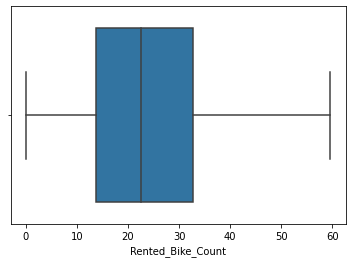

In [ ]:
sns.boxplot(x = np.sqrt(bike_data["Rented_Bike_Count"]))

In [ ]:
bike_data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year',
       'Day', 'Month', 'weekday', 'Months_string'],
      dtype='object')

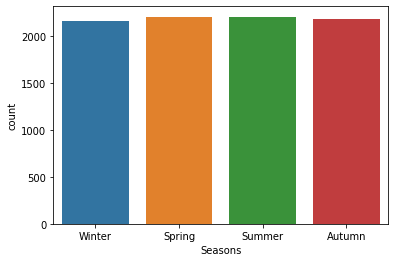

In [ ]:
#count plot for diffrent seasons
sns.countplot(x ='Seasons', data = bike_data)

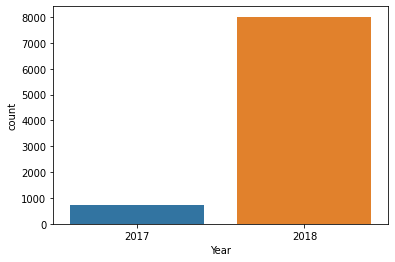

In [ ]:
#comment for countplot for year
sns.countplot(x ='Year', data = bike_data)


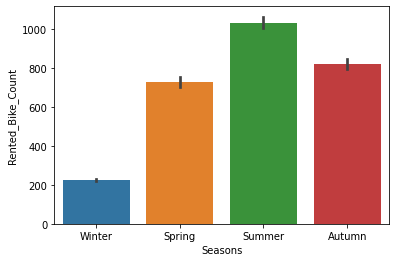

In [ ]:
#Finding relation betwwen seasons and rented bike count. telling us rented bike count on that season.
# sns.set_style('darkgrid')
sns.barplot(x ='Seasons', y ='Rented_Bike_Count', data = bike_data, palette ='tab10')


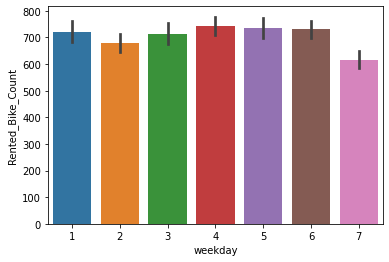

In [ ]:
#plot for the rented bike forweekday
sns.barplot(x ='weekday', y ='Rented_Bike_Count', data = bike_data, palette ='tab10')


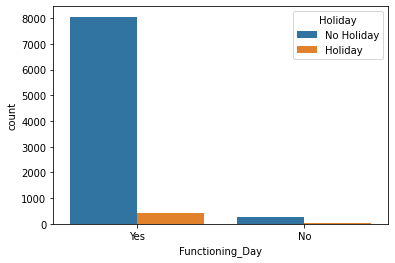

In [ ]:
#holiday or not holiday plot
sns.countplot(x ='Functioning_Day',hue = 'Holiday', data = bike_data)


In [ ]:
bike_data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year',
       'Day', 'Month', 'weekday', 'Months_string'],
      dtype='object')

In [ ]:
#selecting numerical features
numerical_features = ['Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall' ]

In [ ]:
# List of colors in the color palettes
rgb_values = sns.color_palette("bright")

In [ ]:
# Map continents to the colors
color_map = dict(zip(numerical_features, rgb_values))

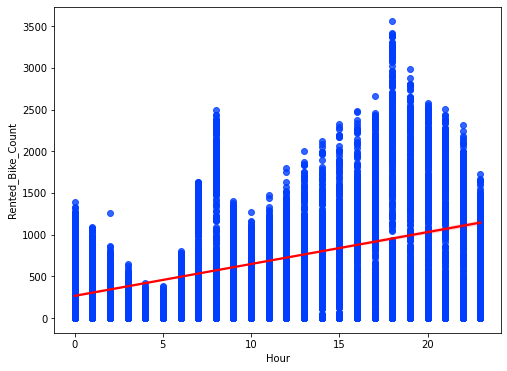

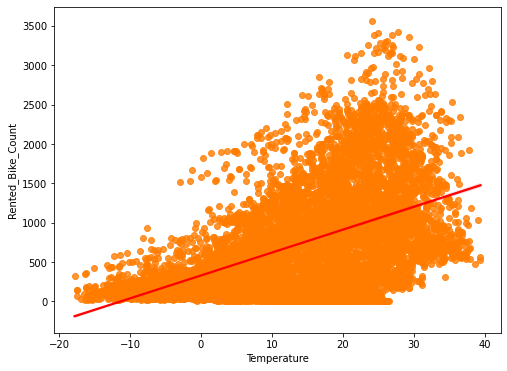

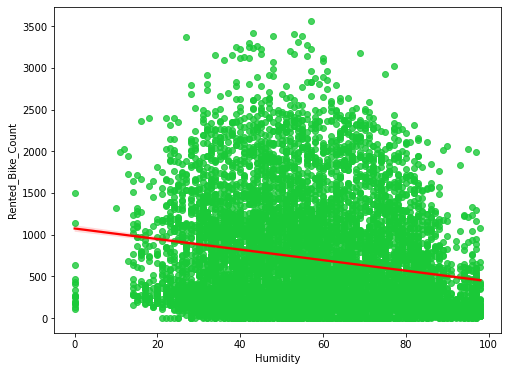

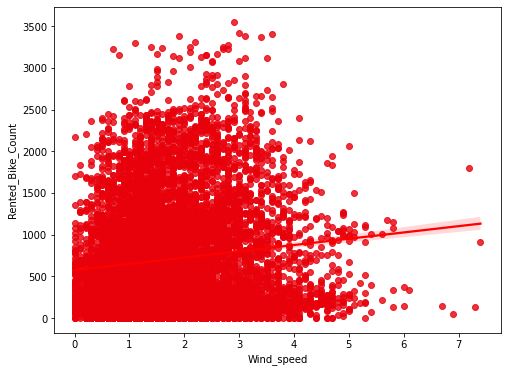

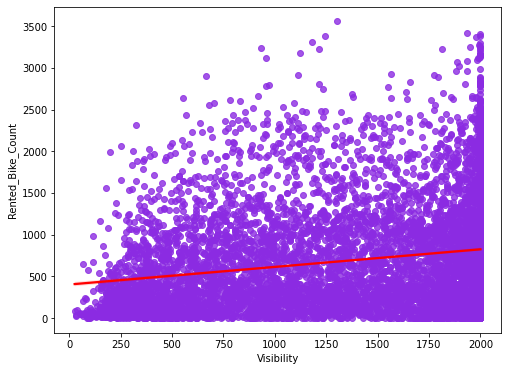

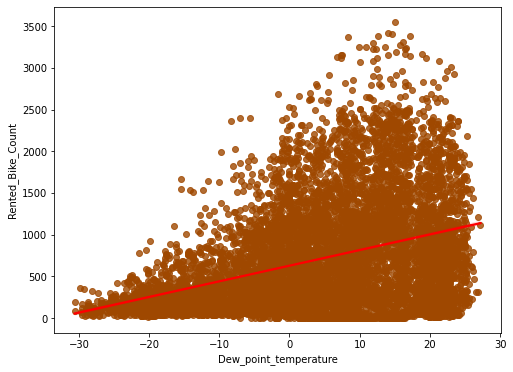

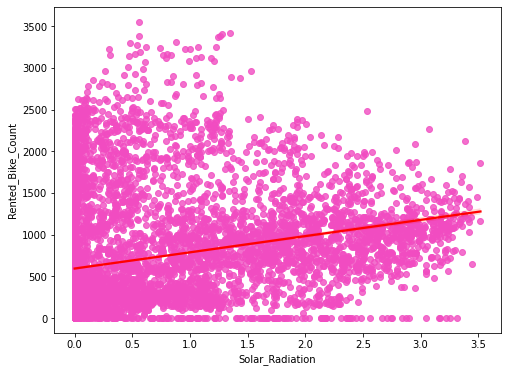

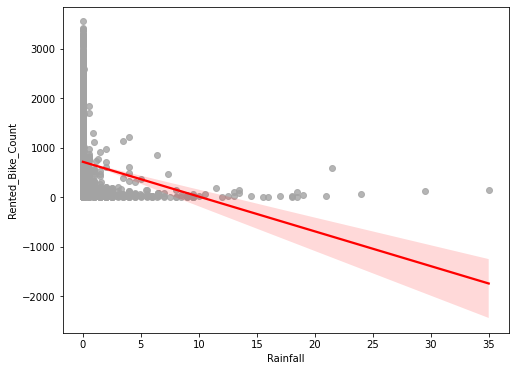

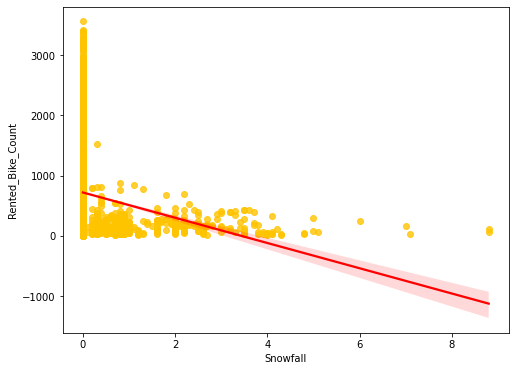

In [ ]:
#plot for numerical feature
plt.rcParams['figure.figsize'] = (8, 6)
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=bike_data[col], y = bike_data['Rented_Bike_Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "Red"})

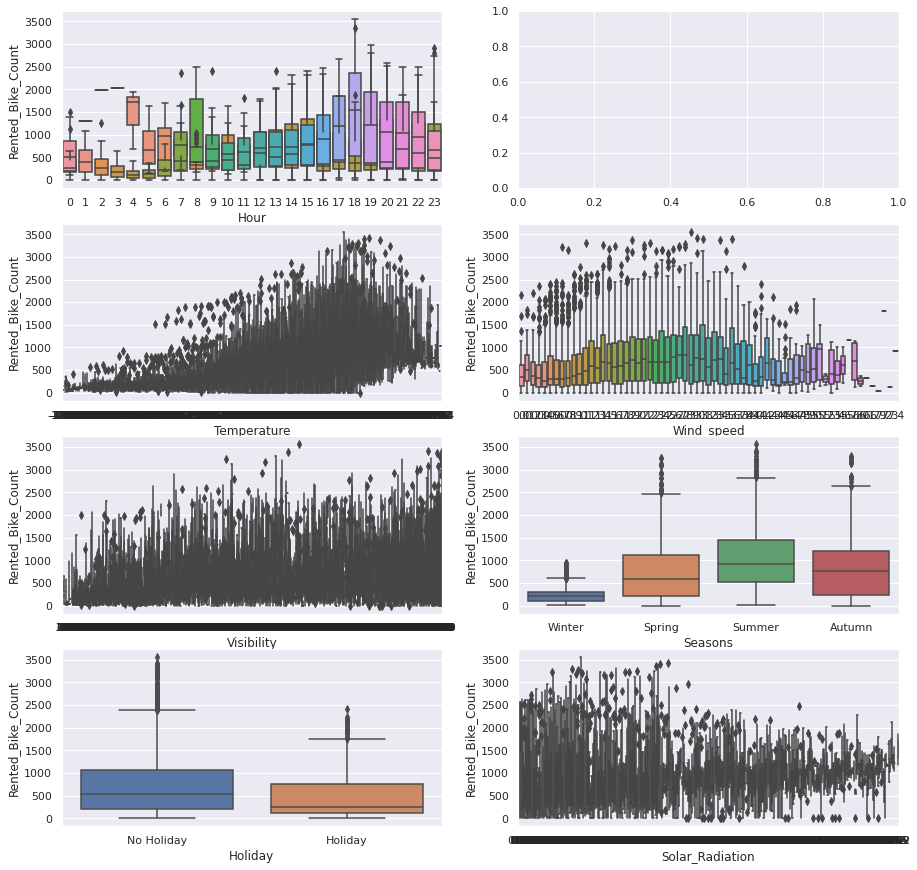

In [ ]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 15)

sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Humidity",orient="v",ax=axes[0][0])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Hour",orient="v",ax=axes[0][0])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Temperature",orient="v",ax=axes[1][0])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Wind_speed",orient="v",ax=axes[1][1])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Visibility",orient="v",ax=axes[2][0])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Seasons",orient="v",ax=axes[2][1])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Holiday",orient="v",ax=axes[3][0])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Solar_Radiation",orient="v",ax=axes[3][1])

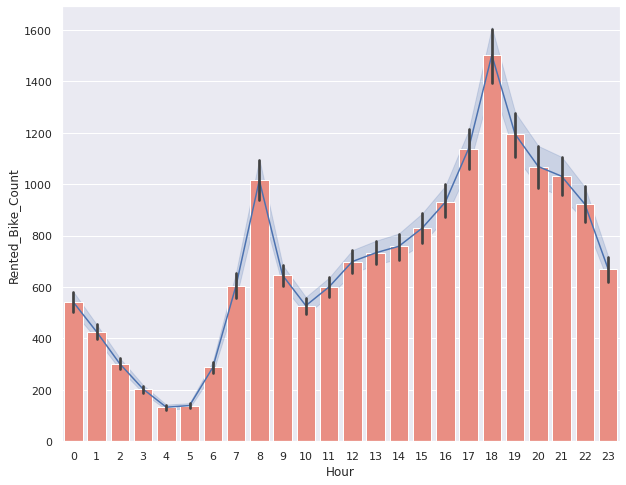

In [ ]:
# bar plot between hr and rented bike count
plt.figure(figsize=(10,8))
sns.lineplot(x = bike_data['Hour'],y = bike_data['Rented_Bike_Count'])
sns.barplot(x = bike_data['Hour'],y = bike_data['Rented_Bike_Count'], color="salmon")


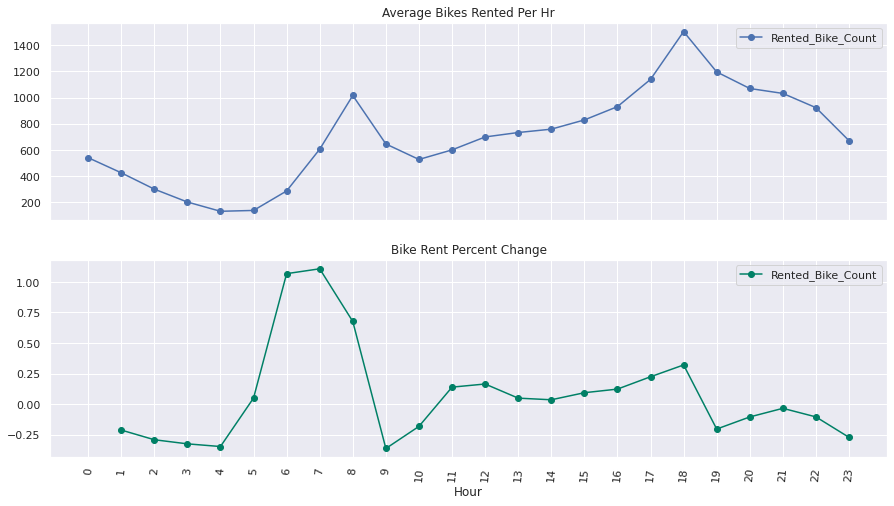

In [ ]:
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = bike_data.groupby('Hour')['Rented_Bike_Count'].mean()
pct_rent_hrs = bike_data.groupby('Hour')['Rented_Bike_Count'].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average rent over time(hrs)
ax1 = avg_rent_hrs.plot(legend=True,ax=axis1,marker='o',title="Average Bikes Rented Per Hr")
ax1.set_xticks(range(len(avg_rent_hrs)))
ax1.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)

# plot precent change for rent over time(hrs)
ax2 = pct_rent_hrs.plot(legend=True,ax=axis2,marker='o',rot=85,colormap="summer",title="Bike Rent Percent Change")
#ax1.set_xticks(range(len(avg_rent_hrs)))

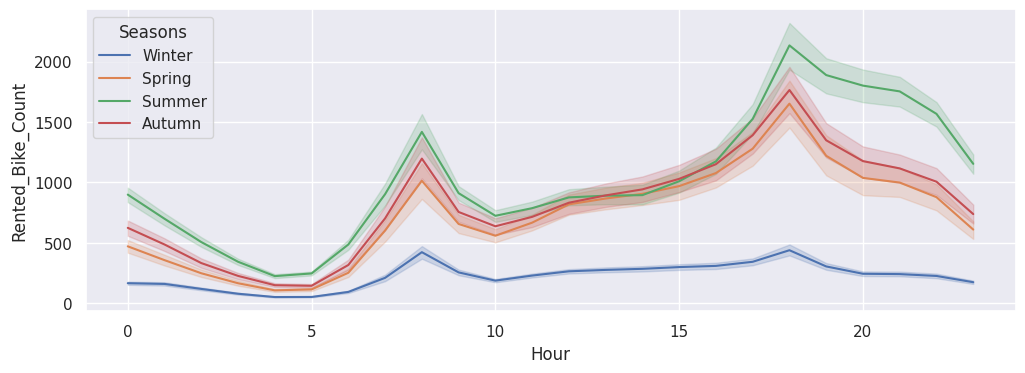

In [ ]:
# line plot seasonal varaition
plt.figure(figsize=(12,4), dpi=100)
sns.lineplot(data=bike_data, x="Hour", y="Rented_Bike_Count", hue="Seasons")

In [ ]:
#correlation data
np.round(bike_data.corr()['Rented_Bike_Count'],3)

Rented_Bike_Count        1.000
Hour                     0.410
Temperature              0.539
Humidity                -0.200
Wind_speed               0.121
Visibility               0.199
Dew_point_temperature    0.380
Solar_Radiation          0.262
Rainfall                -0.123
Snowfall                -0.142
Year                     0.215
Day                      0.047
Month                    0.071
weekday                 -0.022
Name: Rented_Bike_Count, dtype: float64

In [ ]:
# dropping the non-perfoming column
bike_data.drop('Months_string',axis=1,inplace=True)
bike_data.drop('Date',axis=1,inplace=True)

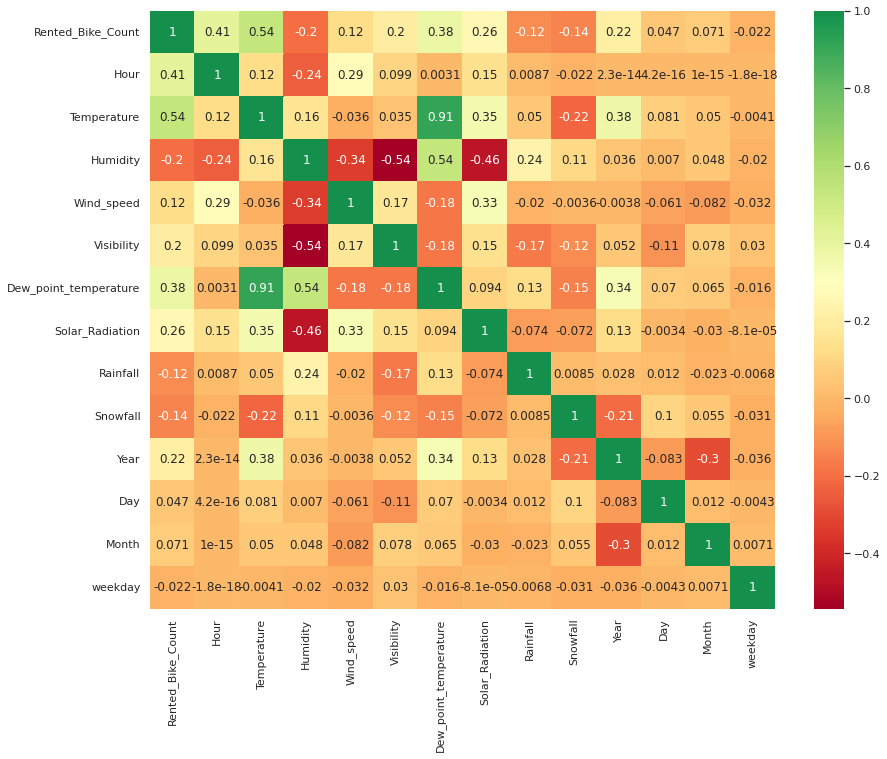

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = bike_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,11))
#plot heat map
g=sns.heatmap(bike_data[top_corr_features].corr(),annot=True,cmap="RdYlGn",center=0.3)

In [ ]:
# creating new  feature
bike_data['Temperature_and_DP_Temp'] = [bike_data['Temperature'][i]+bike_data['Dew_point_temperature'][i] for i in range(len(bike_data))]
bike_data.drop(['Temperature','Dew_point_temperature'],axis=1,inplace=True)


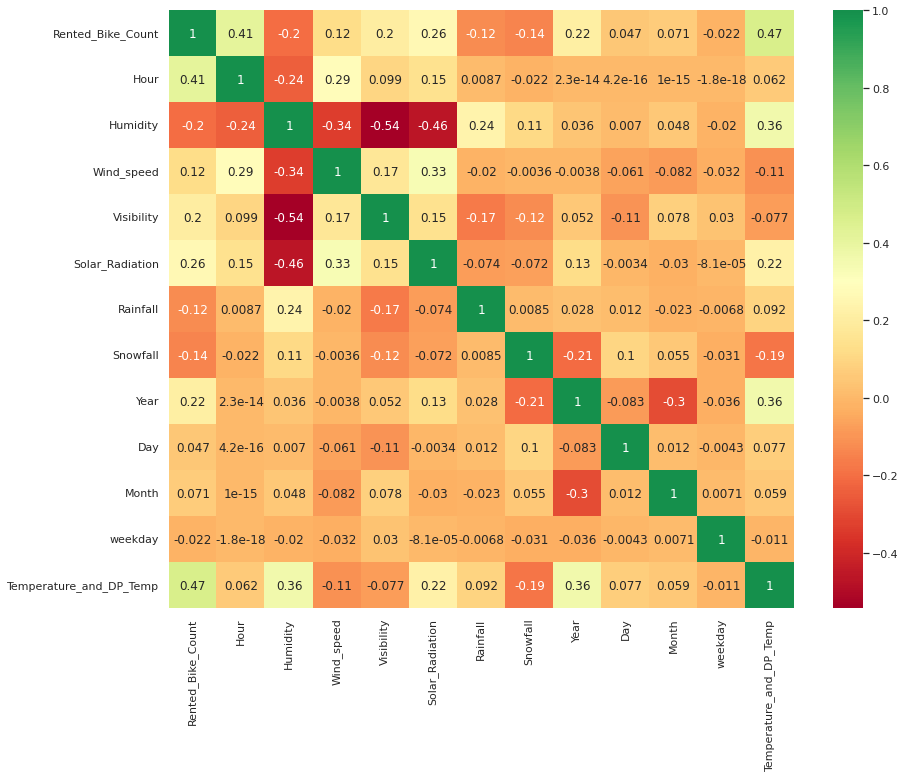

In [ ]:
#correlation plot
corrmat = bike_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,11))
#plot heat map
g=sns.heatmap(bike_data[top_corr_features].corr(),annot=True,cmap="RdYlGn",center=0.3)

In [ ]:
#creating dummies column for the given feature
bike_data=pd.get_dummies(bike_data,drop_first=True)


In [ ]:
# table after feature engineering
bike_data.head()

,Rented_Bike_Count,Hour,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Year,Day,Month,weekday,Temperature_and_DP_Temp,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,254,0,37,2.2,2000,0.0,0.0,0.0,2017,12,1,4,-22.8,0,0,1,1,1
1,204,1,38,0.8,2000,0.0,0.0,0.0,2017,12,1,4,-23.1,0,0,1,1,1
2,173,2,39,1.0,2000,0.0,0.0,0.0,2017,12,1,4,-23.7,0,0,1,1,1
3,107,3,40,0.9,2000,0.0,0.0,0.0,2017,12,1,4,-23.8,0,0,1,1,1
4,78,4,36,2.3,2000,0.0,0.0,0.0,2017,12,1,4,-24.6,0,0,1,1,1


In [ ]:
# removing less importance column
bike_data.drop('weekday',axis=1,inplace=True)

In [ ]:
bike_data.head()

,Rented_Bike_Count,Hour,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Year,Day,Month,Temperature_and_DP_Temp,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,254,0,37,2.2,2000,0.0,0.0,0.0,2017,12,1,-22.8,0,0,1,1,1
1,204,1,38,0.8,2000,0.0,0.0,0.0,2017,12,1,-23.1,0,0,1,1,1
2,173,2,39,1.0,2000,0.0,0.0,0.0,2017,12,1,-23.7,0,0,1,1,1
3,107,3,40,0.9,2000,0.0,0.0,0.0,2017,12,1,-23.8,0,0,1,1,1
4,78,4,36,2.3,2000,0.0,0.0,0.0,2017,12,1,-24.6,0,0,1,1,1


In [ ]:
# shape of the data
bike_data.shape

(8760, 17)

In [ ]:
# Data for all the independent variables
X = bike_data.drop(labels='Rented_Bike_Count',axis=1)

# Data for the dependent variable

y = np.sqrt(bike_data['Rented_Bike_Count'])
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [ ]:
# Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_)


[0.26519605 0.12220053 0.01379074 0.0308574  0.05170706 0.03514998
 0.00247157 0.00134407 0.01790119 0.01623757 0.06919544 0.01642389
 0.01015093 0.18194059 0.00543273 0.16000025]


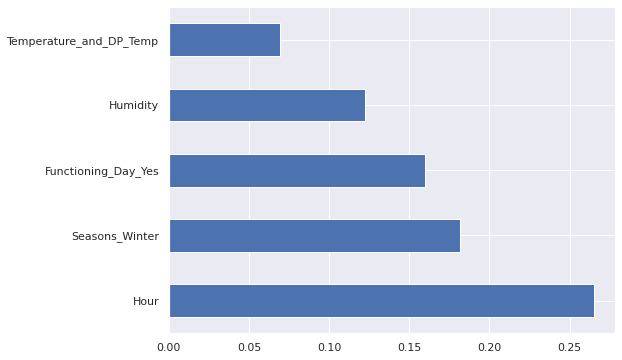

In [ ]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
#import train-test split lib
from sklearn.model_selection import train_test_split

In [ ]:
# function which split data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=34)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7008, 16) (7008,)
(1752, 16) (1752,)


In [ ]:
# Data for all the independent variables
X = bike_data.drop(labels='Rented_Bike_Count',axis=1)

# Data for the dependent variable

y = np.sqrt(bike_data['Rented_Bike_Count'])
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [ ]:
# Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(model.feature_importances_)


[0.26211392 0.11244656 0.01420904 0.03256379 0.06203362 0.03692767
 0.00252575 0.00129179 0.01817561 0.01656902 0.06745263 0.01642053
 0.00993522 0.18194059 0.00550987 0.15988439]


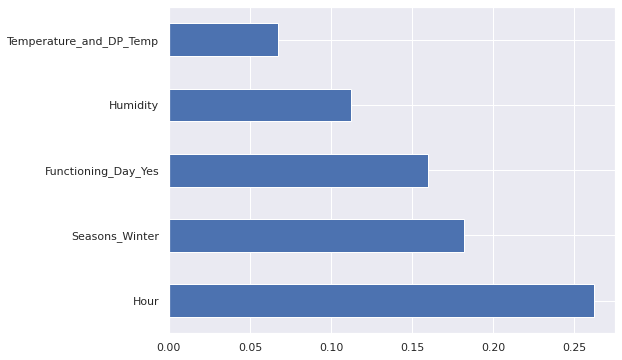

In [ ]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
#import train-test split lib
from sklearn.model_selection import train_test_split

In [ ]:
# function which split data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=34)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

NameError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
# all coeffient
reg.score(X_train, y_train)

0.6547192361864398

In [ ]:
#diffresnt coefficient for different features
reg.coef_

array([ 4.87925477e-01, -2.29940503e-01,  1.89672962e-01, -1.56414191e-04,
       -8.02486527e-01, -1.39558289e+00,  1.86527269e-01, -2.64795650e+00,
       -1.86084876e-02, -2.30326900e-02,  2.47906155e-01, -2.89868003e+00,
       -2.84332142e+00, -9.04145095e+00,  2.85999149e+00,  2.84894893e+01])

In [ ]:
# pred train test
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
#metrics for linear regession analysis
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)




from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 52.95555328513579
RMSE : 7.277056636108846
R2 : 0.6547192361864398
Adjusted R2 : 0.6515350908140958


In [ ]:
#metrics for linear regession analysis
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)




from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 52.95555328513579
RMSE : 7.277056636108846
R2 : 0.6547192361864398
Adjusted R2 : 0.6515350908140958


In [ ]:
#metrics for linear regression analysis for test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_test, y_pred_test)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 55.08739505098533
RMSE : 7.4220883214217634
R2 : 0.6588467149667641
Adjusted R2 : 0.6557006327993107


In [ ]:
#metrics for linear regression analysis for test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_test, y_pred_test)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 55.08739505098533
RMSE : 7.4220883214217634
R2 : 0.6588467149667641
Adjusted R2 : 0.6557006327993107


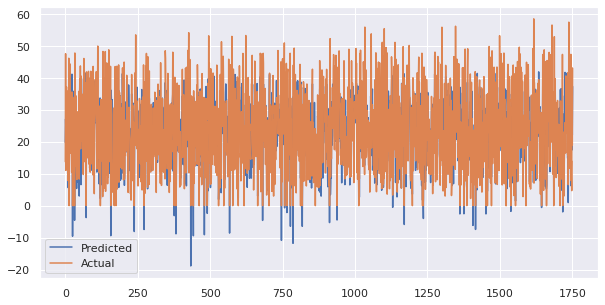

In [ ]:
#predicted vs actual for test data
plt.figure(figsize=(10,5))
plt.plot(np.array(y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

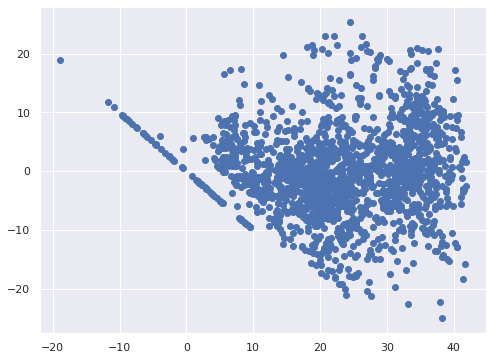

In [ ]:
# Heteroscedasticity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1,max_iter=3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# lasso score 
lasso.score(X_train, y_train)

0.6436819185266032

In [ ]:
# lasso y pred test and train
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
# metrics for lasso regressor flor train dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 54.64834166119503
RMSE : 7.392451667829492
R2 : 0.6436819185266032
Adjusted R2 : 0.6403959880922664


In [ ]:
# mterics for lasso regressor flor test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 57.49564641514416
RMSE : 7.582588371733241
R2 : 0.643932543343507
Adjusted R2 : 0.6406489241466748


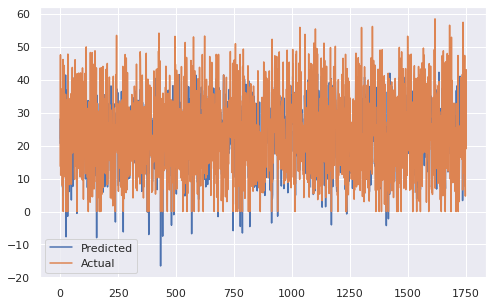

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

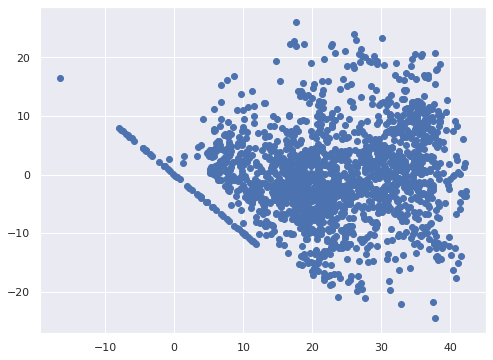

In [ ]:
# Heteroscedasticity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))